# <div style="color: #fff; display:fill; border-radius: 40px; background-color: #07496E  ; text-align: center; letter-spacing: 0.1px; overflow: hidden;padding: 20px; color: white; overflow: hidden; margin: 0; font-size: 100%">Exploratory Analysis
</div>

In [197]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import polars as pl
import math
import numpy as np

In [227]:
carwale_dataset = pd.read_csv(r'C:\Users\pryns\OneDrive\Documents\Python Works\zz.carwale data\02.Pre-Processing\Pre-processed Data Stage-III\carwale_dataset.csv')

In [3]:
carwale_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76362 entries, 0 to 76361
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   profileId                    76362 non-null  object 
 1   Car                          76362 non-null  object 
 2   Kilometers                   76362 non-null  float64
 3   Insurance_Type               76362 non-null  object 
 4   Make                         76362 non-null  object 
 5   Version                      76362 non-null  object 
 6   Year_Made                    76362 non-null  int64  
 7   Month_Made                   76362 non-null  object 
 8   City                         76362 non-null  object 
 9   No_Of_Owners                 76362 non-null  object 
 10  Price_(Rs)                   76362 non-null  int64  
 11  Model                        76362 non-null  object 
 12  State                        76362 non-null  object 
 13  Registration_Typ

In [4]:
# change the price of a car at
carwale_dataset.at[22576,'Price'] = 9600000

# No. of Cars in Market by Brand/Make

In [5]:
car_make_count = carwale_dataset[['Make','profileId']].groupby('Make').count().reset_index().sort_values(by='profileId',ascending = False).copy()

In [8]:
car_make_count_1 = pd.concat([car_make_count[0:5],pd.DataFrame(car_make_count.sum()).transpose()],axis=0).reset_index().copy()
car_make_count_1.iloc[5,1] = 'Others'
car_make_count_1.drop(columns=['index'],inplace = True)

In [9]:
car_make_count_1

,Make,profileId
0,Maruti Suzuki,21539
1,Hyundai,13523
2,Honda,5621
3,Mahindra,5183
4,Tata,4273
5,Others,76362


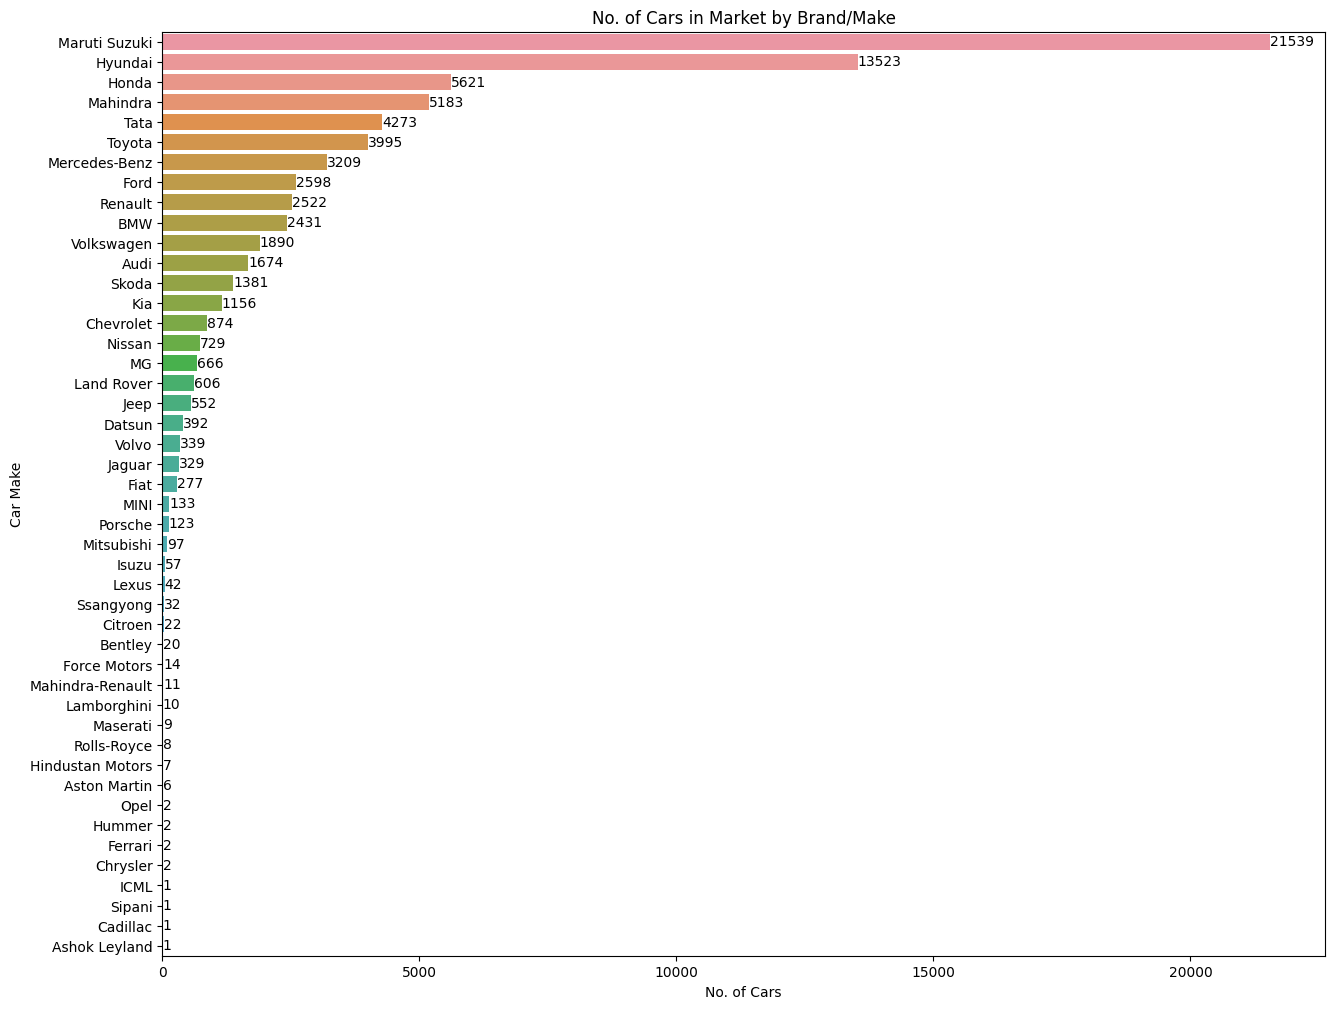

In [10]:
plt.figure(figsize = (15,12))

ax = sns.barplot(x = car_make_count['profileId'], y = car_make_count['Make'])
ax.bar_label(ax.containers[0], fontsize=10);

plt.title('No. of Cars in Market by Brand/Make')
plt.ylabel('Car Make')
plt.xlabel('No. of Cars')

plt.show()

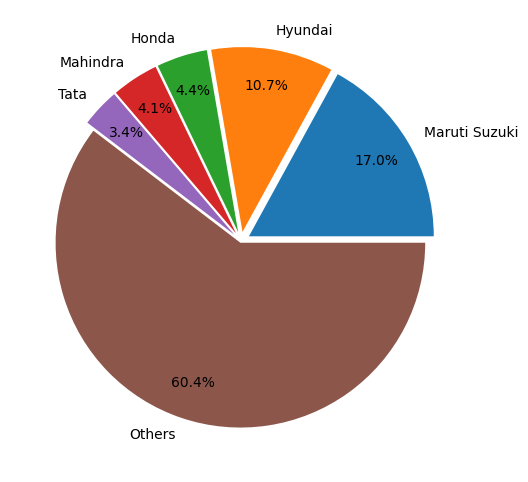

In [11]:

plt.figure(figsize = (15,6))                # plot/figure size
plt.pie( 
         x = car_make_count_1['profileId'], 
         labels =car_make_count_1['Make'],
         autopct = '%1.1f%%',
         pctdistance=0.8,
         rotatelabels=False,
         explode=[0.05,0.05,0.05,0.05,0.05,0.01]     
       
       )
plt.show()

* The most no. of cars available for sales in the second hand market is of brand **Maruti Suzuki**, followed by **Hyundai** and then **Honda**
* Other brands contribute to around 60% of the second hand market including high end cars.

# No. of Cars in Market by Made Year

In [12]:
car_makeyear_count = carwale_dataset[['Year_Made','profileId']].groupby('Year_Made').count().reset_index().sort_values(by='profileId',ascending = False).copy()

In [13]:
car_makeyear_count

,Year_Made,profileId
27,2018,7737
26,2017,7384
28,2019,6472
25,2016,6355
24,2015,5878
30,2021,5317
23,2014,5293
29,2020,4598
31,2022,4588
22,2013,4407


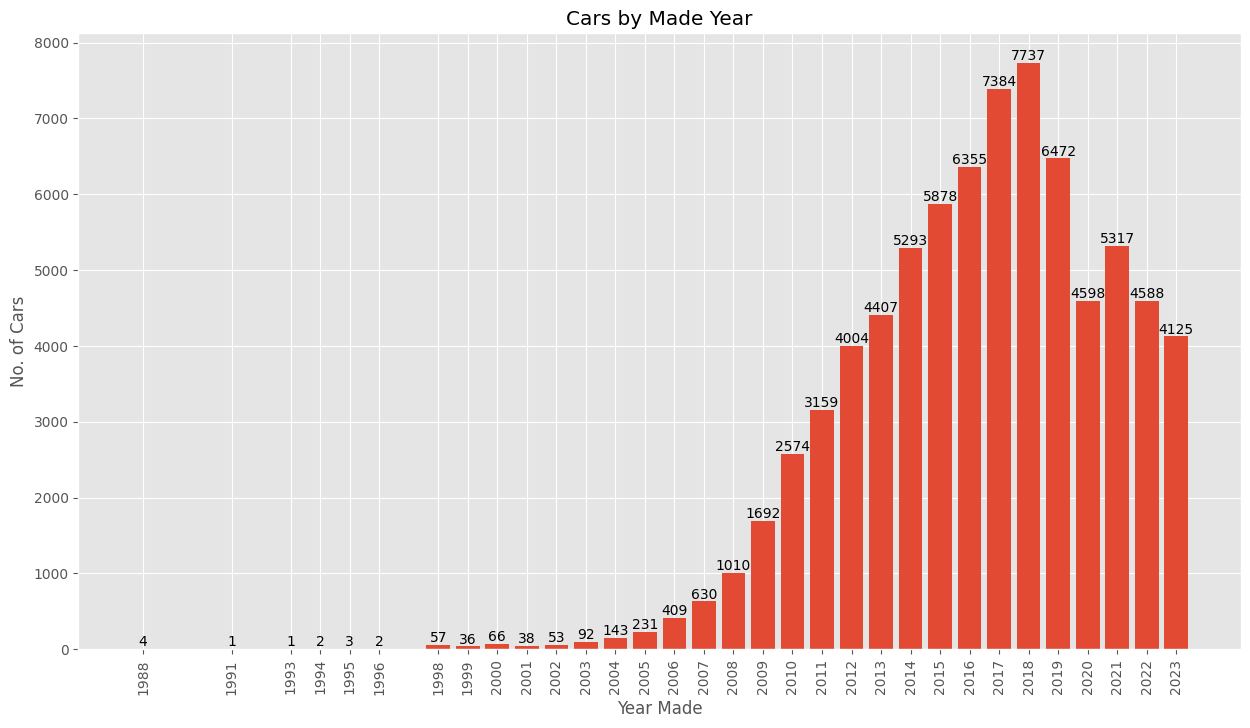

In [14]:
plt.figure(figsize = (15,8))
plt.style.use('ggplot')
bar_plot = plt.bar(
                    x = car_makeyear_count[car_makeyear_count['Year_Made']>1900]['Year_Made'],
                    height = car_makeyear_count[car_makeyear_count['Year_Made']>1900]['profileId'],
                    width = 0.8
                    )

plt.title('Cars by Made Year')
plt.xlabel('Year Made')
plt.ylabel('No. of Cars')
plt.bar_label(bar_plot)
plt.xticks(car_makeyear_count[car_makeyear_count['Year_Made']>1900]['Year_Made'],rotation=90)


plt.show()

<b>
    <ul>There are highest no. of cars being sold were made in 2018.</ul>
    <ul>This might give us a hint that may be every 5 years, most people sell their old car to buy new ones.</ul>
    <ul>But that might not be the case as we do not have enought evidence. </ul>
        
</b>

# No. of Cars in Market by State and City

In [15]:
car_State_count = carwale_dataset[['State','profileId']].groupby(['State']).count().reset_index().sort_values(by='profileId',ascending = False).copy()

In [16]:
car_State_count.shape

(36, 2)

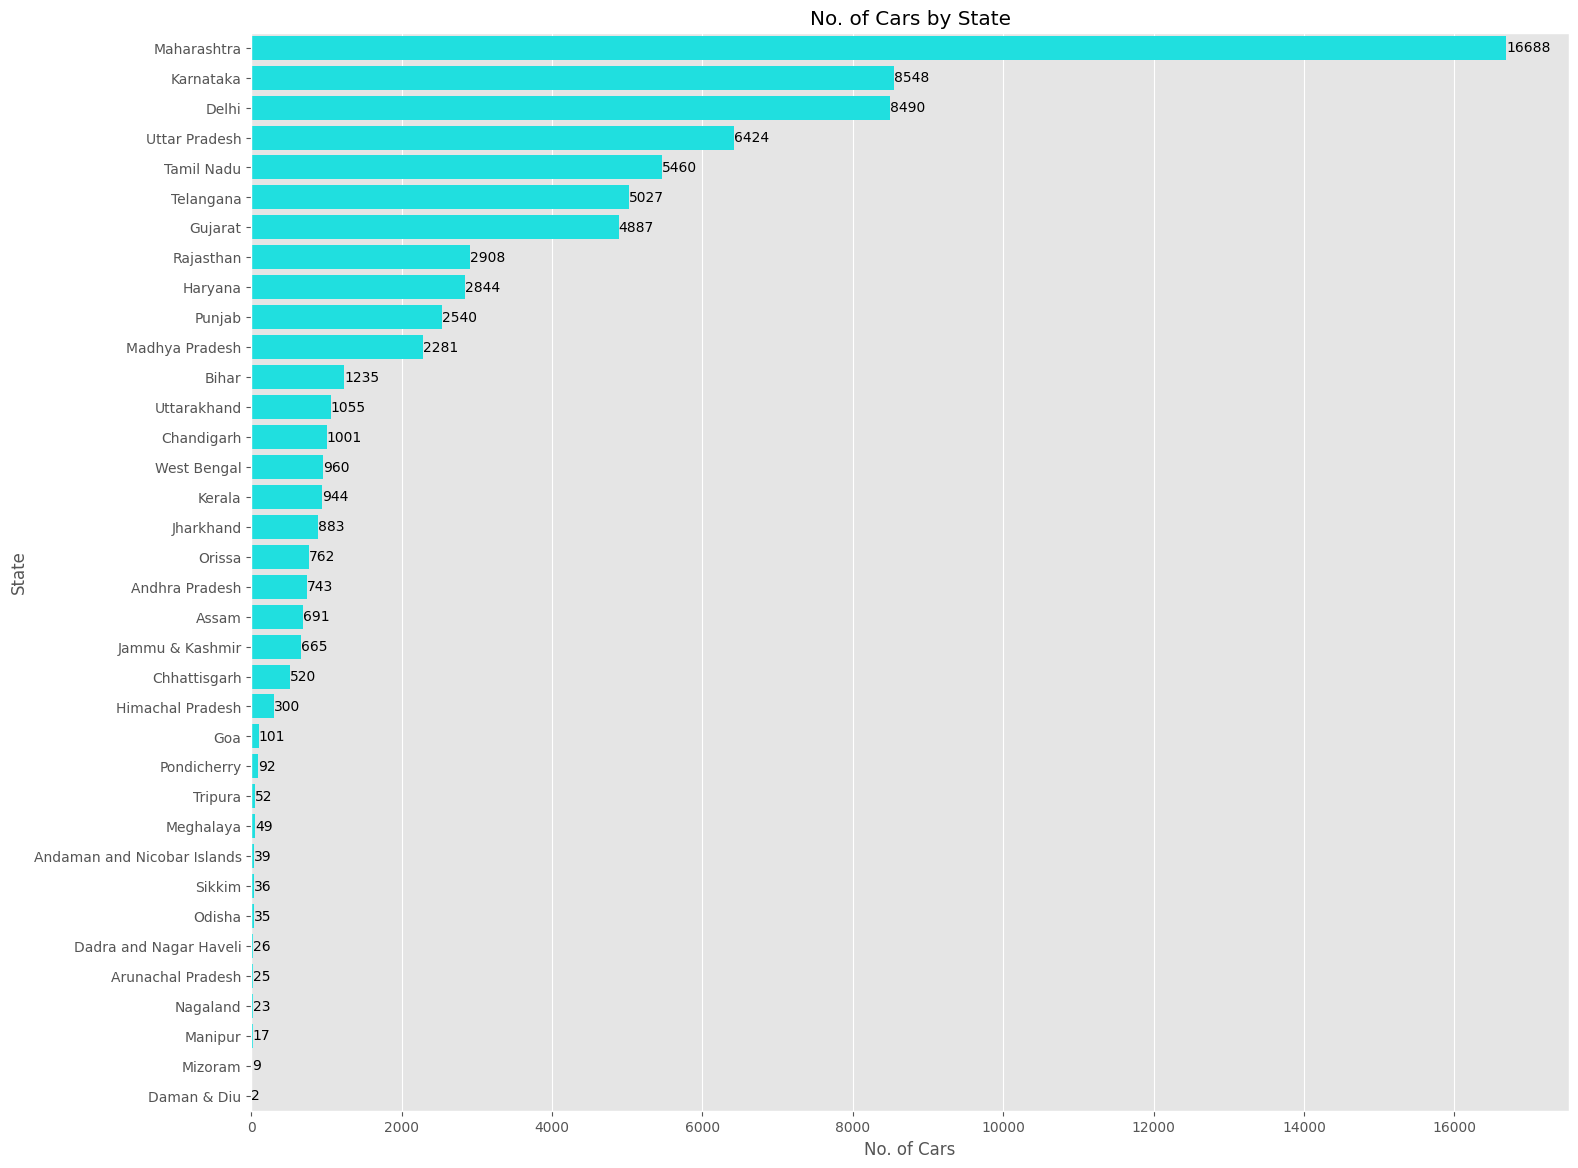

In [17]:
plt.figure(figsize = (17,14))

ax = sns.barplot(
                 car_State_count, 
                 x="profileId", 
                 y="State", 
                 orient="h",
                 color='cyan',
                 errorbar=None
                )

ax.bar_label(ax.containers[0], fontsize=10);

plt.title('No. of Cars by State')
plt.ylabel('State')
plt.xlabel('No. of Cars')

plt.show()

In [18]:
16688/car_State_count['profileId'].sum()

0.21853801629082528

* Cars listed under Maharashtra is the highest compared to other states, followed by Karnataka, Delhi, Uttar Pradesh and Tamil Nadu.
* Around 22% of the total Cars listed are from Maharashtra.

In [19]:
car_city_count = carwale_dataset[['City','profileId']].groupby(['City']).count().reset_index().sort_values(by='profileId',ascending = False).copy()

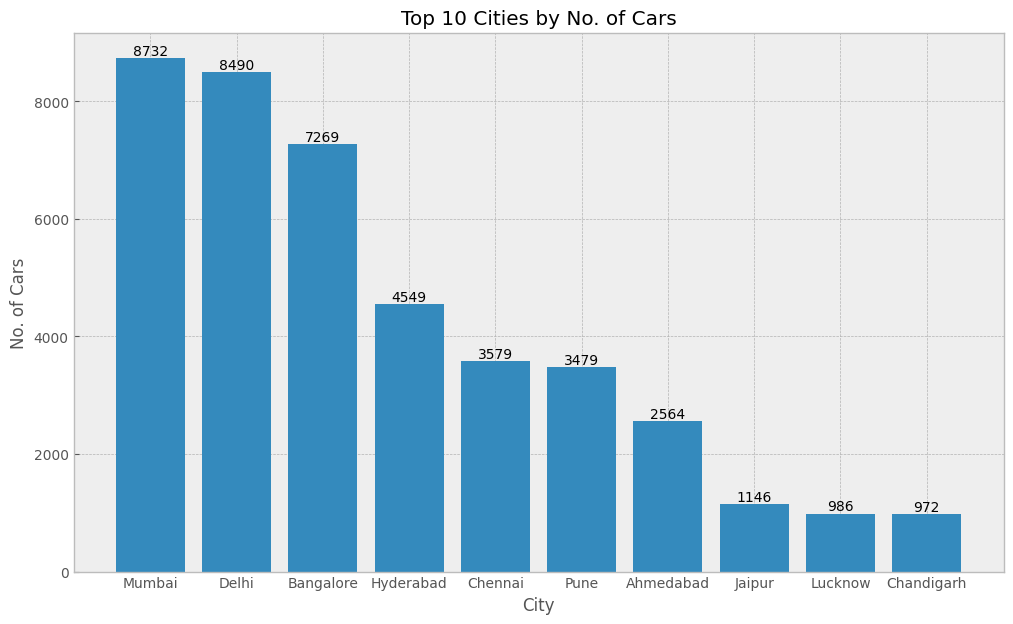

In [20]:
plt.figure(figsize = (12,7))
plt.style.use('bmh')
bar_plot = plt.bar(
                    x = car_city_count['City'][0:10],
                    height = car_city_count['profileId'][0:10],
                    width = 0.8
                    )

plt.title('Top 10 Cities by No. of Cars')
plt.xlabel('City')
plt.ylabel('No. of Cars')
plt.bar_label(bar_plot)
#plt.xticks(car_makeyear_count[car_makeyear_count['Year_Made']>1900]['Year_Made'],rotation=90)


plt.show()

* Mumbai city has the highest no. of cars listed

# Other Analytics

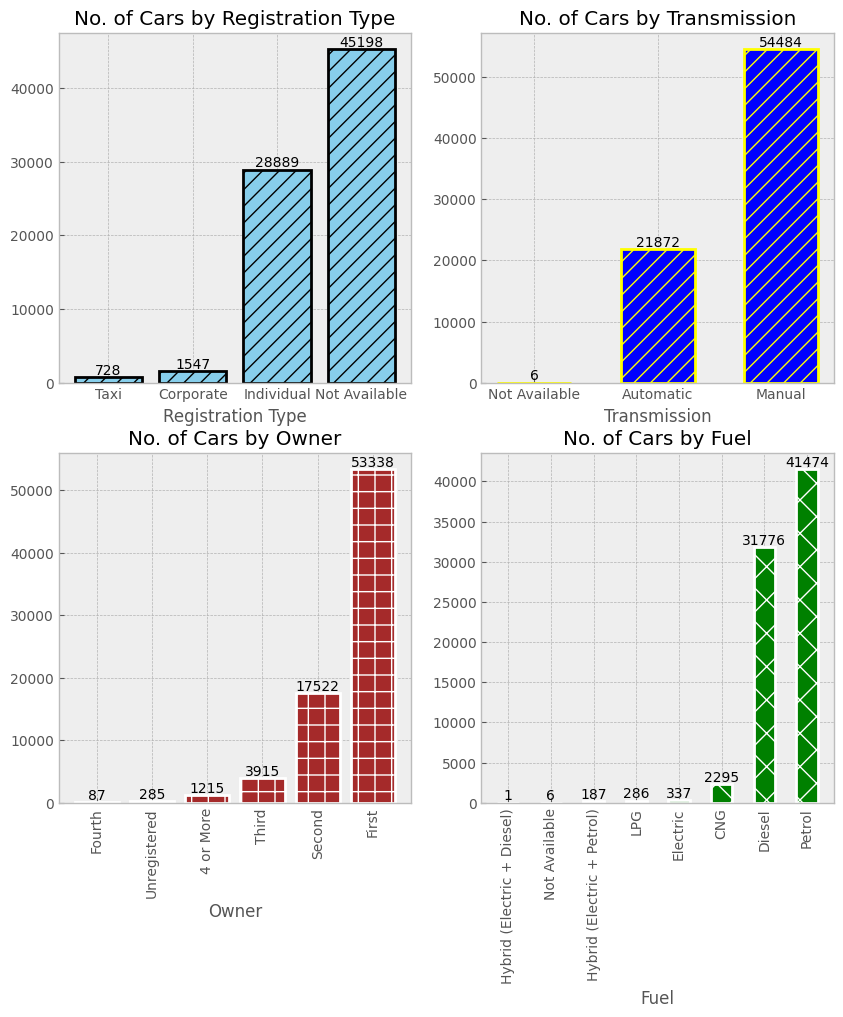

In [76]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
plt.style.use('bmh')
axs[0,0].bar(
                    x = carwale_dataset[['Registration_Type','profileId']].groupby('Registration_Type').count().sort_values(by='profileId').index,
                    height = carwale_dataset[['Registration_Type','profileId']].groupby('Registration_Type').count().sort_values(by='profileId')['profileId'],
                    width = 0.8,
                    color='skyblue',
                    edgecolor='black',
                    linewidth=2,
                    hatch='//'
                    )


axs[0,1].bar(
                    x = carwale_dataset[['Transmission_Type','profileId']].groupby('Transmission_Type').count().sort_values(by='profileId').index,
                    height = carwale_dataset[['Transmission_Type','profileId']].groupby('Transmission_Type').count().sort_values(by='profileId')['profileId'],
                    width = 0.6,
                    color='blue',
                    edgecolor='yellow',
                    linewidth=2,
                    hatch='//'
                    )
axs[1,0].bar(
                    x = carwale_dataset[['No_Of_Owners','profileId']].groupby('No_Of_Owners').count().sort_values(by='profileId').index,
                    height = carwale_dataset[['No_Of_Owners','profileId']].groupby('No_Of_Owners').count().sort_values(by='profileId')['profileId'],
                    width = 0.8,
                    color='brown',
                    edgecolor='white',
                    linewidth=2,
                    hatch='+'
                    )



axs[1,1].bar(
                    x = carwale_dataset[['Fuel','profileId']].groupby('Fuel').count().sort_values(by='profileId').index,
                    height = carwale_dataset[['Fuel','profileId']].groupby('Fuel').count().sort_values(by='profileId')['profileId'],
                    width = 0.5,
                    color='green',
                    edgecolor='white',
                    linewidth=2,
                    hatch='x'
                    )

axs[0,0].bar_label(axs[0,0].containers[0], fontsize=10)
axs[0,1].bar_label(axs[0,1].containers[0], fontsize=10)
axs[1,0].bar_label(axs[1,0].containers[0], fontsize=10)
axs[1,1].bar_label(axs[1,1].containers[0], fontsize=10)

axs[1,0].tick_params(axis='x', rotation=90)
axs[1,1].tick_params(axis='x', rotation=90)

axs[0,0].set_xlabel('Registration Type')
axs[0,1].set_xlabel('Transmission')
axs[1,0].set_xlabel('Owner')
axs[1,1].set_xlabel('Fuel')

axs[0,0].set_title('No. of Cars by Registration Type')
axs[0,1].set_title('No. of Cars by Transmission')
axs[1,0].set_title('No. of Cars by Owner')
axs[1,1].set_title('No. of Cars by Fuel')

plt.show()

<b>
    <ul> Most of the cars listed for selling are Petrol cars and have single owners.</ul>
    <ul> Maximum cars listed are of Manual Transmission. </ul>
    <ul> Many of the cars being sold are non-commercial registered vehicles.</ul>
</b>

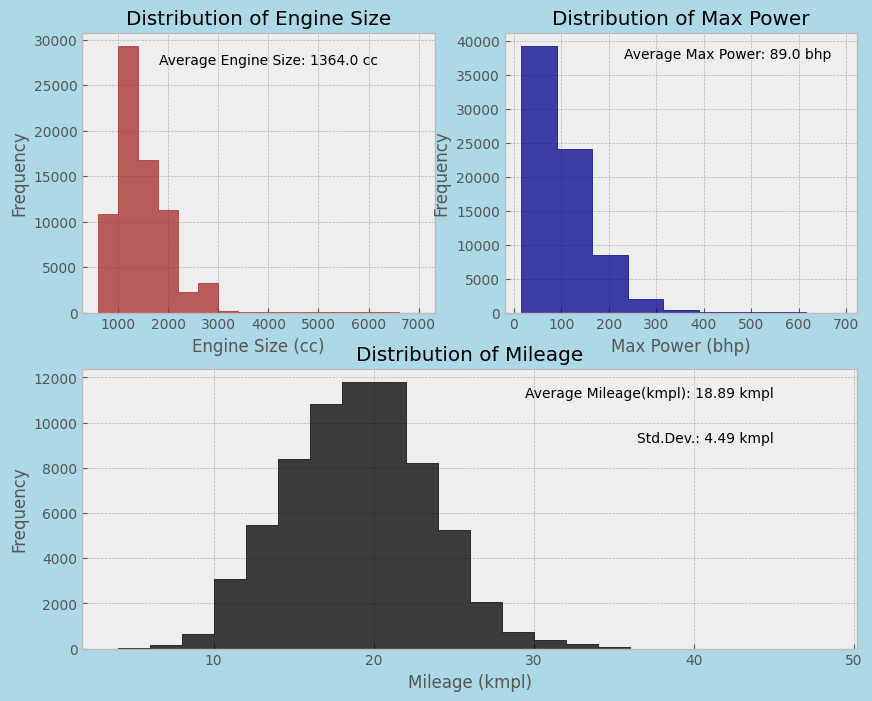

In [214]:
fig = plt.figure(figsize = (10,8), facecolor = 'lightblue') 

ax1 = fig.add_subplot(2, 2, 1)

ax2 = fig.add_subplot(222)

ax3 = fig.add_subplot(2,2,(3,4))



bins1 = [600,1000,1400,1800,2200,2600,3000,3400,3800,4200,4600,5000,5400,5800,6200,6600,7000]
bins2 = range(15,700,75)
bins3 = range(4,50,2)

sns.histplot(carwale_dataset['Displacement_(cc)'],
             bins = bins1,
             color = 'brown',
             element="step",
             ax = ax1
             )

ax1.set_title("Distribution of Engine Size")

ax1.set_xlabel("Engine Size (cc)")
ax1.set_ylabel("Frequency")
ax1.annotate( 'Average Engine Size: '+ str(carwale_dataset['Displacement_(cc)'].median()) + ' cc', # text to annotate with
             xy=(4000, 27000), # co-ordinates of annotation text to start from;adjust the co-ordinates as required
             rotation = 0, # rotate the text; Text instance kwarg; 
             va='bottom',  # vertically 'bottom' aligned; Text instance kwarg; 
             ha='center',  # horizontally 'left' aligned; Text instance kwarg; 
            ) 

sns.histplot(carwale_dataset['Max_Power_(bhp)'],
             bins = bins2,
             color = 'darkblue',
             element="step",
             ax = ax2
            )

ax2.set_title("Distribution of Max Power")

ax2.set_xlabel("Max Power (bhp)")
ax2.set_ylabel("Frequency")
ax2.annotate( 'Average Max Power: '+ str(carwale_dataset['Max_Power_(bhp)'].median()) + ' bhp', # text to annotate with
             xy=(450, 37000), # co-ordinates of annotation text to start from;adjust the co-ordinates as required
             rotation = 0, # rotate the text; Text instance kwarg; 
             va='bottom',  # vertically 'bottom' aligned; Text instance kwarg; 
             ha='center',  # horizontally 'left' aligned; Text instance kwarg; 
             )


sns.histplot(carwale_dataset['Mileage_(kmpl)'],
             bins = bins3,
             color = 'black',
             element="step",
             ax = ax3,
             
            )
ax3.set_title("Distribution of Mileage")

ax3.set_xlabel("Mileage (kmpl)")
ax3.set_ylabel("Frequency")
ax3.annotate( 'Average Mileage(kmpl): '+ str(round(carwale_dataset[carwale_dataset['Fuel'].isin(['Diesel', 'Petrol', 'CNG', 'LPG','Hybrid (Electric + Petrol)','Hybrid (Electric + Diesel)'])]['Mileage_(kmpl)'].mean(),2)) + ' kmpl', # text to annotate with
             xy=(45, 11000), # co-ordinates of annotation text to start from;adjust the co-ordinates as required
             rotation = 0, # rotate the text; Text instance kwarg; 
             va='bottom',  # vertically 'bottom' aligned; Text instance kwarg; 
             ha='right',  # horizontally 'left' aligned; Text instance kwarg; 
             )
ax3.annotate( 'Std.Dev.: '+ str(round(np.std(carwale_dataset['Mileage_(kmpl)']),2)) + ' kmpl', # text to annotate with
             xy=(45, 9000), # co-ordinates of annotation text to start from;adjust the co-ordinates as required
             rotation = 0, # rotate the text; Text instance kwarg; 
             va='bottom',  # vertically 'bottom' aligned; Text instance kwarg; 
             ha='right',  # horizontally 'left' aligned; Text instance kwarg; 
             )

plt.show()

* Average Engine Size of the cars list is 1364 cc. Since the distribution is right skewed, Median is used as a measure of Average.
* Most cars listed for sales have a moderate engine size.
* Whereas the average bhp (Max Power) is 89 bhp, which is considered as low.
* Many cars being sold have low bhp.
* We can expect the average mileage of 18.9 kmpl with a deviation of around (+ or - 5) kmpl

In [151]:
carwale_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76362 entries, 0 to 76361
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   profileId                    76362 non-null  object 
 1   Car                          76362 non-null  object 
 2   Kilometers                   76362 non-null  float64
 3   Insurance_Type               76362 non-null  object 
 4   Make                         76362 non-null  object 
 5   Version                      76362 non-null  object 
 6   Year_Made                    76362 non-null  int64  
 7   Month_Made                   76362 non-null  object 
 8   City                         76362 non-null  object 
 9   No_Of_Owners                 76362 non-null  object 
 10  Price_(Rs)                   76362 non-null  int64  
 11  Model                        76362 non-null  object 
 12  State                        76362 non-null  object 
 13  Registration_Typ

# Analysing Prices

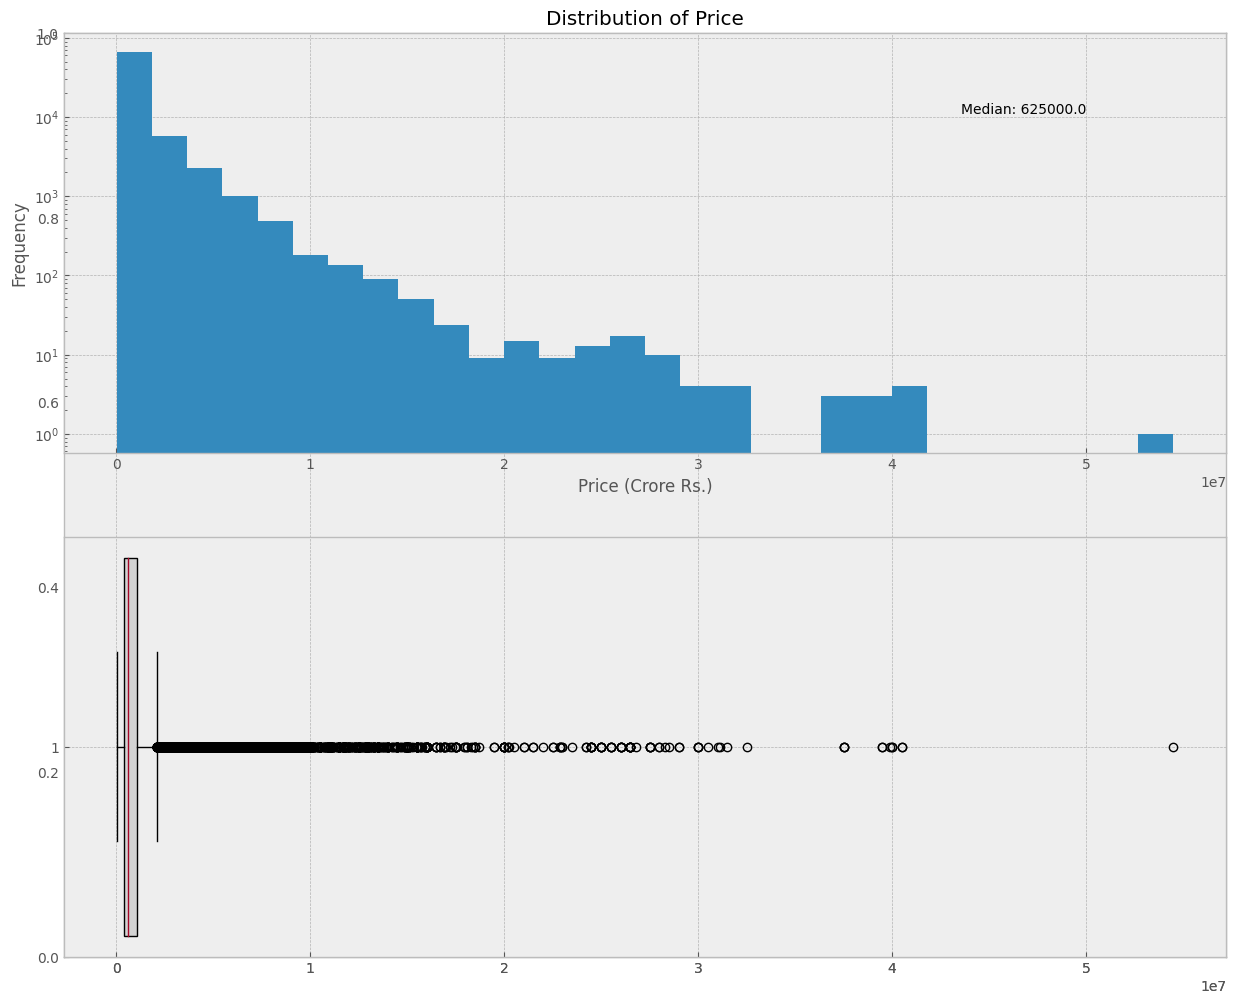

In [430]:
fig = plt.figure(figsize = (15,12)) 

ax1 = fig.add_subplot(2, 1, 1,sharex=plt.gca())

ax2 = fig.add_subplot(212,sharex=plt.gca())

ax1.hist(x=carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'],
         bins=30,
         log=True
        )

ax2.boxplot(x=carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'],
            vert=False,
            widths = 0.9,
            patch_artist = True,
            boxprops = {
                        "edgecolor":"black",
                        "facecolor":"lightgrey",
                       }, 
            showfliers=True
           )


#sns.boxplot(x=carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'],ax=ax2 )




ax1.set_title("Distribution of Price")

ax1.set_xlabel("Price (Crore Rs.)")
ax1.set_ylabel("Frequency")

ax1.annotate( 'Median: '+ str(carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'].median()), 
             xy=(50000000, 10000), 
             rotation = 0, 
             va='bottom',  
             ha='right',   
             )

plt.show()


* It can be seen that the distribution of Price is heavily skewed to the right (positive).
* Huge no. of outliers could be seen and signifies that there are cars with very high prices.
* The average price of the cars is Rs. 625000 as we treat cars with value 50 lakhs and above as outliers
* Below is the breakdown of the distribution of prices omitting the outliers

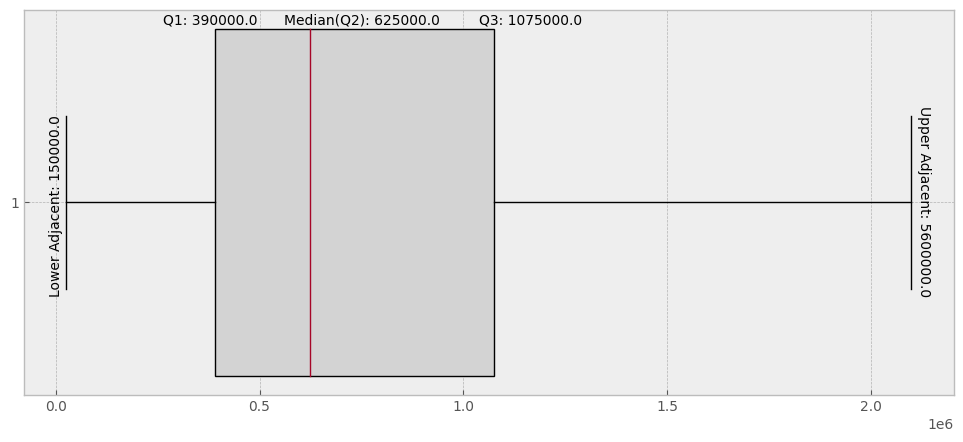

In [410]:
# Calculate quartiles
q1 = np.percentile(carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'], 25)
q2 = np.percentile(carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'], 50)
q3 = np.percentile(carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'], 75)

# Calculate whiskers
whisker_low,whisker_high = np.percentile(carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'], [2.5, 97.5])


plt.figure(figsize = (12,5)) 

plt.boxplot(x=carwale_dataset[['Price_(Rs)']].dropna().sort_values('Price_(Rs)')['Price_(Rs)'],
            vert=False,
            widths = 0.9,
            patch_artist = True,
            boxprops = {
                        "edgecolor":"black",
                        "facecolor":"lightgrey",
                       }, 
            showfliers=False,   #eliminating outliers
           )

plt.annotate("Q1: "+ str(q1),xy=(0.15, 0.962),xycoords='axes fraction')
plt.annotate("Median(Q2): "+ str(q2),xy=(0.28, 0.962),xycoords='axes fraction')
plt.annotate("Q3: "+ str(q3),xy=(0.49, 0.962),xycoords='axes fraction')
plt.annotate("Lower Adjacent: "+ str(whisker_low),xy=(0.027, 0.262),xycoords='axes fraction',rotation = 90)
plt.annotate("Upper Adjacent: "+ str(whisker_high),xy=(0.961, 0.262),xycoords='axes fraction',rotation = -90)

plt.show()

* Most of the cars listed fall in the range 3.9 lakhs to 10 Lakhs.
* The box plot suggests that very few no. of cars fall beyond te 50 lakhs category

* chceking which brands fall under 10 lakhs category

In [439]:
car_make_price = carwale_dataset[carwale_dataset['Price_(Rs)']<=10_00_000][['Make','Price_(Rs)']].sort_values(by='Price_(Rs)').groupby('Make').sum().reset_index().copy()

In [441]:
car_make_price = car_make_price.sort_values('Price_(Rs)',ascending = False)

In [467]:
# below are the brands which fall under the 10 Lakh value category

carwale_dataset[(carwale_dataset['Price_(Rs)']<=10_00_000)].sort_values(by='Price_(Rs)').groupby('Make').count().reset_index()[['Make','profileId']].rename(columns = {'profileId':'Count'})

,Make,Count
0,Ashok Leyland,1
1,Audi,146
2,BMW,146
3,Chevrolet,868
4,Citroen,14
5,Datsun,392
6,Fiat,272
7,Force Motors,11
8,Ford,2244
9,Hindustan Motors,7


* There are some luxury car brands under the 10 Lakh rupees category which is good, but whats the catch here?

In [462]:
# below are the brands which fall above 10 Lakh and under 50 Lakh value category

carwale_dataset[(carwale_dataset['Price_(Rs)']>10_00_000)&(carwale_dataset['Price_(Rs)']<=50_00_000)].sort_values(by='Price_(Rs)').groupby('Make').count().reset_index()[['Make','profileId']].rename(columns = {'profileId':'Count'})

,Make,Count
0,Audi,1397
1,BMW,1701
2,Bentley,1
3,Cadillac,1
4,Chevrolet,4
5,Chrysler,2
6,Citroen,8
7,Fiat,3
8,Force Motors,3
9,Ford,334


In [468]:
# below are the brands which fall above 50 Lakh value category

carwale_dataset[(carwale_dataset['Price_(Rs)']>50_00_000)].sort_values(by='Price_(Rs)').groupby('Make').count().reset_index()[['Make','profileId']].rename(columns = {'profileId':'Count'})


,Make,Count
0,Aston Martin,6
1,Audi,131
2,BMW,584
3,Bentley,19
4,Chevrolet,2
5,Ferrari,2
6,Fiat,2
7,Ford,20
8,Hummer,1
9,Jaguar,46


* Most of the cars beyond 50 Lakh rupees are luxury brands

# Expensive and Cheap Cars (top 10)

In [502]:
top_10_expensive = carwale_dataset.sort_values(by = 'Price_(Rs)',ascending = False)[['Car','Price_(Rs)']].groupby('Car').max().sort_values('Price_(Rs)',ascending = False).head(10)
top_10_cheap = carwale_dataset.sort_values(by = 'Price_(Rs)',ascending = False)[['Car','Price_(Rs)']].groupby('Car').max().sort_values('Price_(Rs)',ascending = True).head(10)

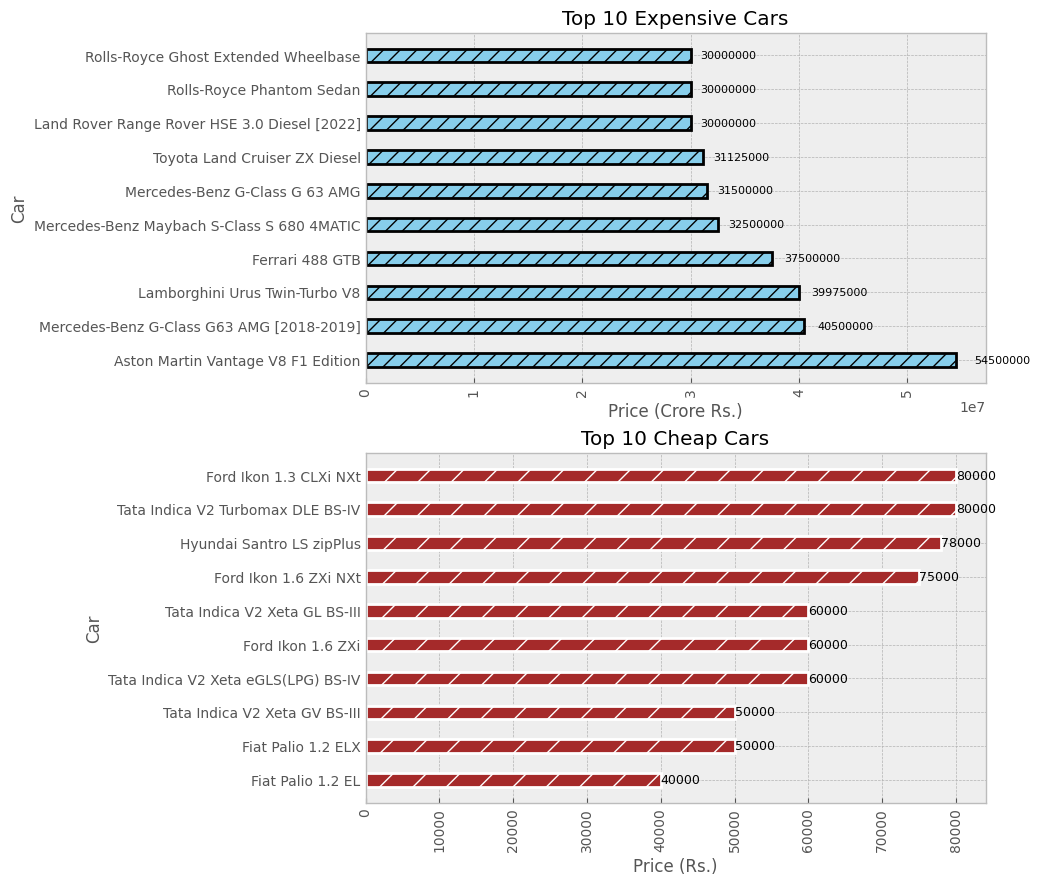

In [613]:

fig,axs = plt.subplots(2,1,figsize = (8,10))
plt.style.use('bmh')
axs[0].barh(
                    y = top_10_expensive.index,
                    width = top_10_expensive['Price_(Rs)'],
                    height = 0.4,
                    color='skyblue',
                    edgecolor='black',
                    linewidth=2,
                    hatch='//'
                    )


axs[1].barh(
                    y = top_10_cheap.index,
                    width = top_10_cheap['Price_(Rs)'],
                    height = 0.4,
                    color='brown',
                    edgecolor='white',
                    linewidth=2,
                    hatch='/'
                    )

axs[0].tick_params(axis='x', rotation=90)
axs[1].tick_params(axis='x', rotation=90)

for i, value in enumerate (top_10_expensive['Price_(Rs)']):
    axs[0].annotate(str(value), xy=(value+value*0.03,i), ha='left', va='center', fontsize=8)
axs[1].bar_label(axs[1].containers[0], fontsize=9)

axs[0].set_title('Top 10 Expensive Cars')
axs[1].set_title('Top 10 Cheap Cars')

axs[0].set_xlabel('Price (Crore Rs.)')
axs[1].set_xlabel('Price (Rs.)')

axs[0].set_ylabel('Car')
axs[1].set_ylabel('Car')

plt.show()

* Aston Martin Vantage V8 F1 Edition is priced at the highest, whereas Fiat Palio 1.2 EL is priced at the lowest.

In [614]:
carwale_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76362 entries, 0 to 76361
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   profileId                    76362 non-null  object 
 1   Car                          76362 non-null  object 
 2   Kilometers                   76362 non-null  float64
 3   Insurance_Type               76362 non-null  object 
 4   Make                         76362 non-null  object 
 5   Version                      76362 non-null  object 
 6   Year_Made                    76362 non-null  int64  
 7   Month_Made                   76362 non-null  object 
 8   City                         76362 non-null  object 
 9   No_Of_Owners                 76362 non-null  object 
 10  Price_(Rs)                   76362 non-null  int64  
 11  Model                        76362 non-null  object 
 12  State                        76362 non-null  object 
 13  Registration_Typ

# Maximum No. of Car Brands by State

In [652]:
carwale_dataset[['Make','State']].drop_duplicates().groupby(['State']).count().reset_index()

,State,Make
0,Andaman and Nicobar Islands,9
1,Andhra Pradesh,20
2,Arunachal Pradesh,6
3,Assam,22
4,Bihar,26
5,Chandigarh,26
6,Chhattisgarh,24
7,Dadra and Nagar Haveli,9
8,Daman & Diu,2
9,Delhi,32


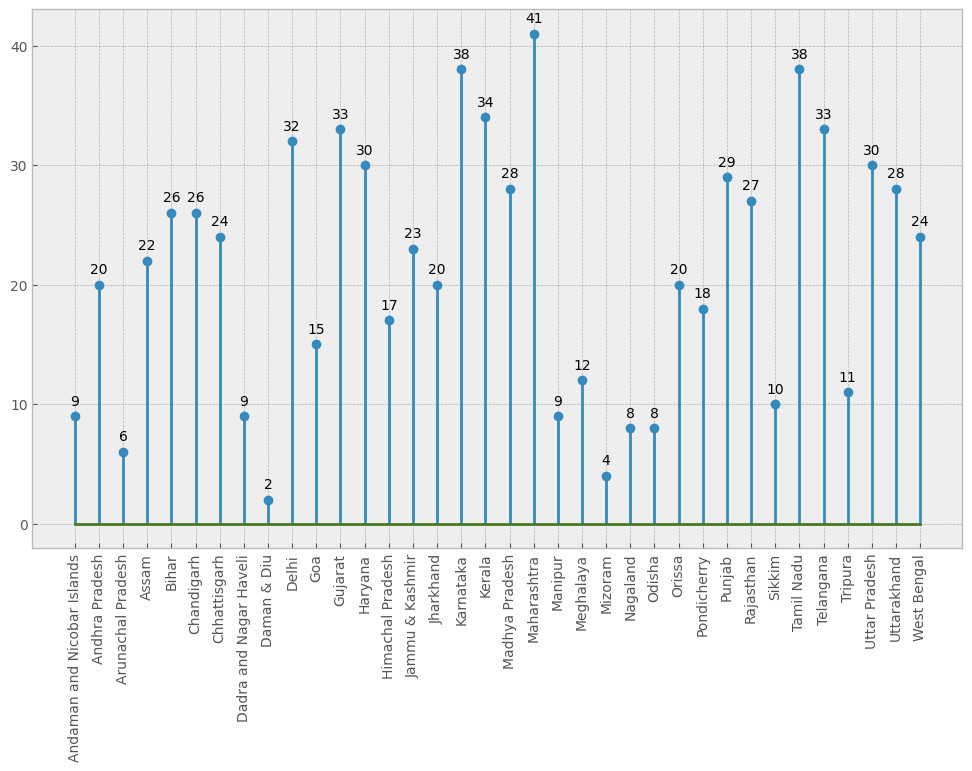

In [669]:
x = carwale_dataset[['Make','State']].drop_duplicates().groupby(['State']).count().reset_index()['State']
y = carwale_dataset[['Make','State']].drop_duplicates().groupby(['State']).count().reset_index()['Make']

fig = plt.figure(figsize = (12,7)) 

plt.stem(
            x,
            y
        )

for xi, yi in zip(x, y):
    plt.text(xi, yi+0.7, str(yi), ha='center', va='bottom')
    
plt.tick_params(axis='x', rotation=90)

plt.show()

# Price Variation of a particular Model by State

In [707]:
max_carprice_state = carwale_dataset[['Car','Make','State','Price_(Rs)']].drop_duplicates().groupby(['Car','Make','State']).max().reset_index()

* Maximum price by Car and State is considered.

**Maruti Suzuki Swift VDi**

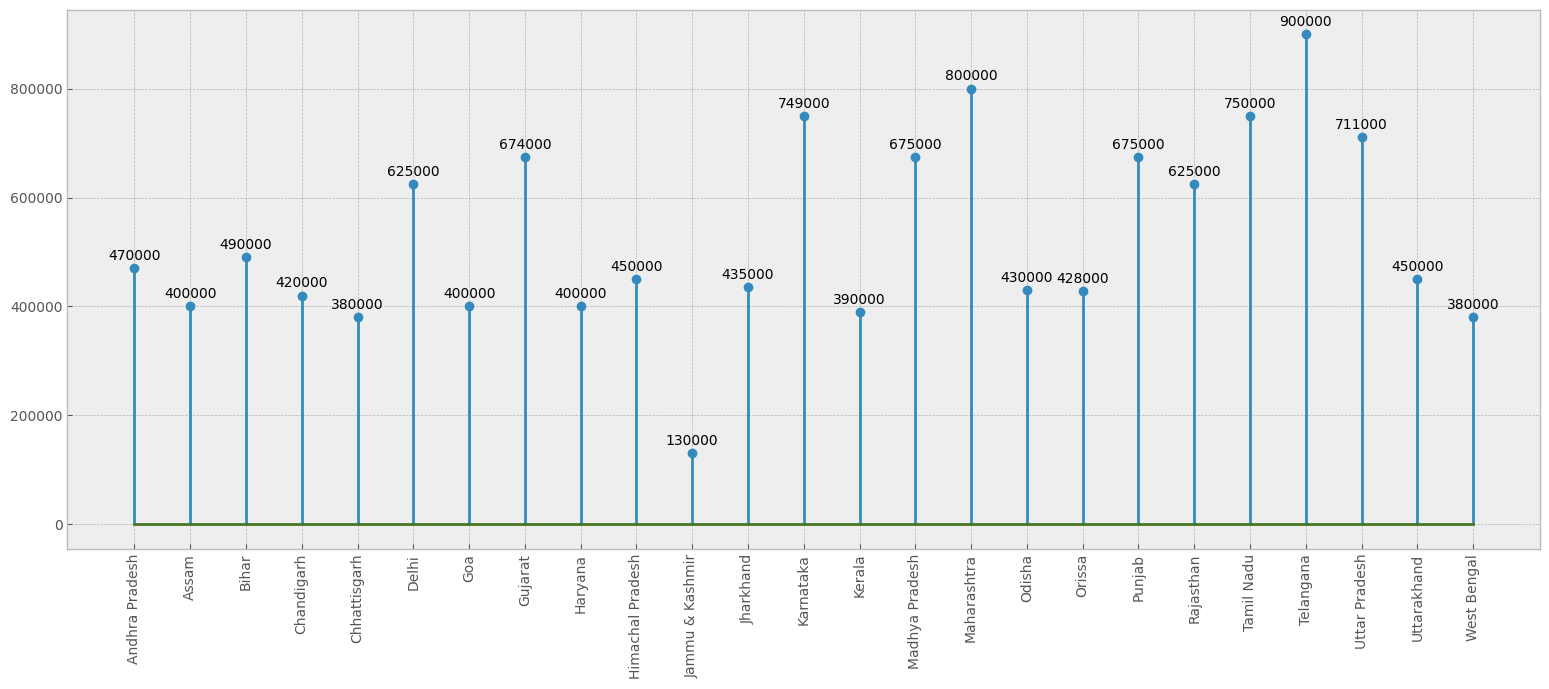

In [711]:
x = max_carprice_state[max_carprice_state['Car']=='Maruti Suzuki Swift VDi']['State']
y = max_carprice_state[max_carprice_state['Car']=='Maruti Suzuki Swift VDi']['Price_(Rs)']

fig = plt.figure(figsize = (19,7)) 

plt.stem(
            x,
            y
        )

for xi, yi in zip(x, y):
    plt.text(xi, yi+10000, str(yi), ha='center', va='bottom')
    
plt.tick_params(axis='x', rotation=90)

plt.show()

* The price of the car depends on many factors like, the freatures, damage, kilometers run.
* This is just a view of how the price of a particular car model varies by state.
* It can be seen this Model in Telanga has the highest price of Rs. 9 Lakh, whereas  the lowest is in J&K Rs. 1.3 Lakh.

**Honda WR-V VX MT Petrol**

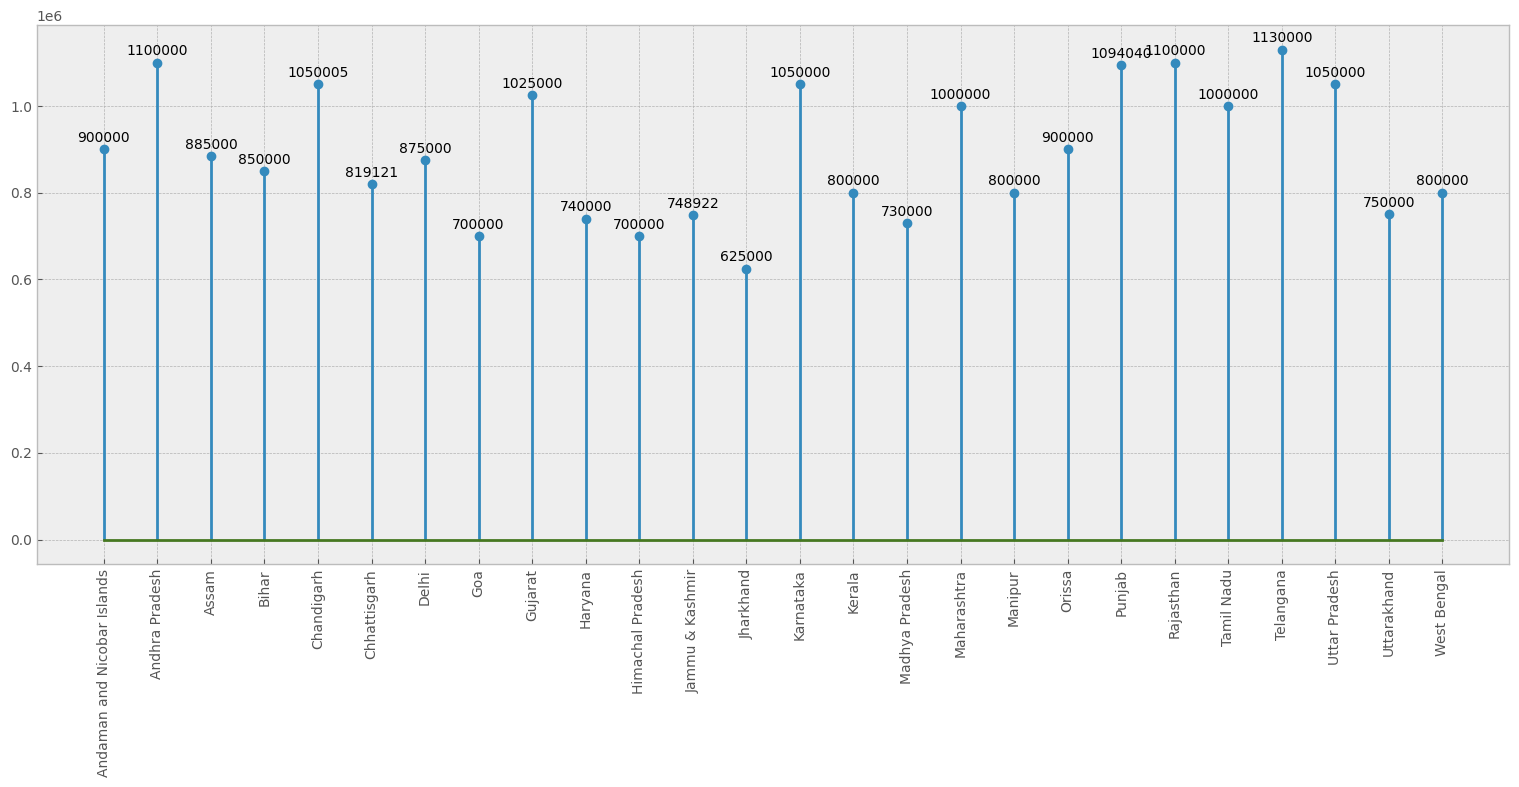

In [710]:
x = max_carprice_state[max_carprice_state['Car']=='Honda WR-V VX MT Petrol']['State']
y = max_carprice_state[max_carprice_state['Car']=='Honda WR-V VX MT Petrol']['Price_(Rs)']

fig = plt.figure(figsize = (19,7)) 

plt.stem(
            x,
            y
        )

for xi, yi in zip(x, y):
    plt.text(xi, yi+10000, str(yi), ha='center', va='bottom')
    
plt.tick_params(axis='x', rotation=90)

plt.show()

* Honda WR-V VX MT Petrol is priced highest at 11.3 Lakhs in Telangana whereas the same model has the lowest price in Jharkhand

* Hyundai i10 Magna 1.2 Kappa2 is priced highest at 4.4 Lakhs in Gujarat, whereas it is lowest in West Bengal

**Hyundai i10 Magna 1.2 Kappa2**

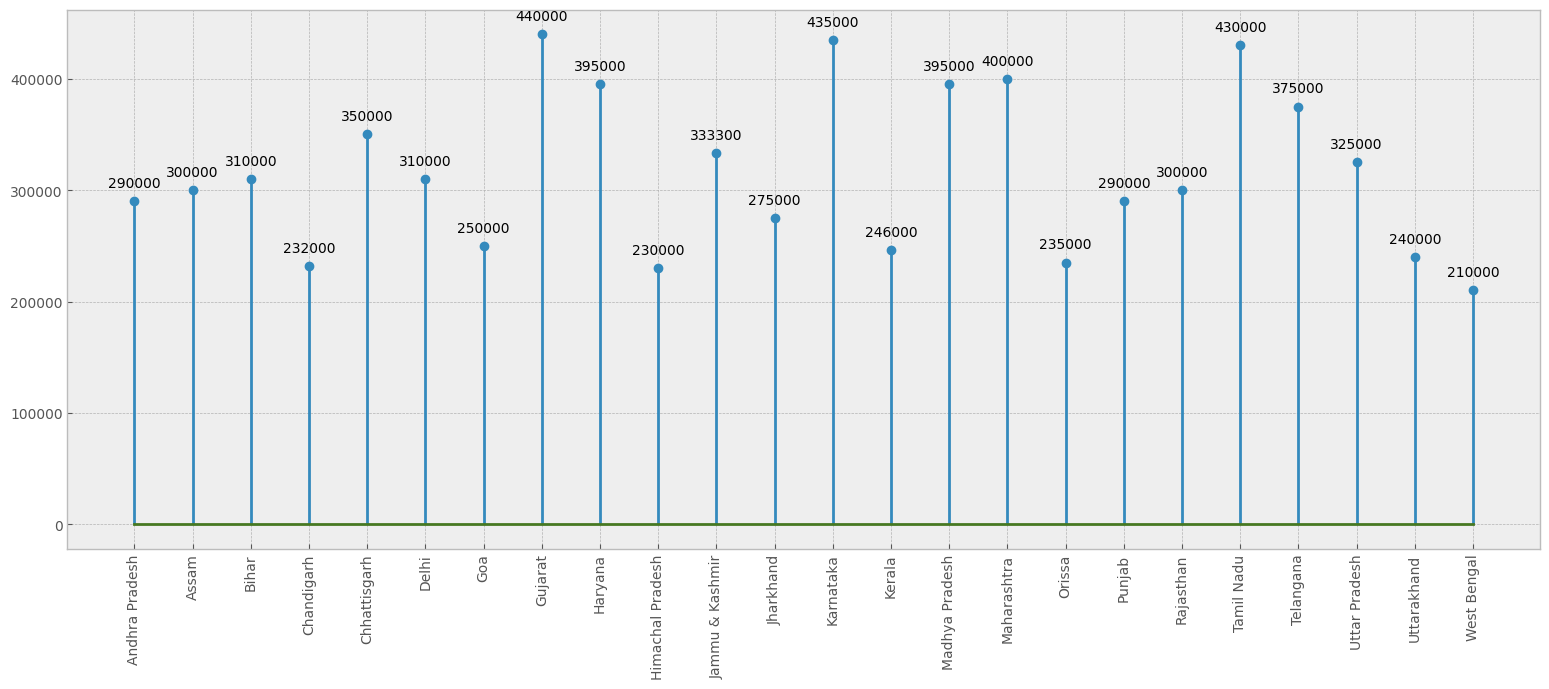

In [709]:


x = max_carprice_state[max_carprice_state['Car']=='Hyundai i10 Magna 1.2 Kappa2']['State']
y = max_carprice_state[max_carprice_state['Car']=='Hyundai i10 Magna 1.2 Kappa2']['Price_(Rs)']

fig = plt.figure(figsize = (19,7)) 

plt.stem(
            x,
            y
        )

for xi, yi in zip(x, y):
    plt.text(xi, yi+10000, str(yi), ha='center', va='bottom')
    
plt.tick_params(axis='x', rotation=90)

plt.show()

# Heatmap of Max Price by Brand and State

In [718]:
max_carprice_state_2 = carwale_dataset[['Make','State','Price_(Rs)']].drop_duplicates().groupby(['Make','State']).max().reset_index()

In [720]:
max_carprice_state_2.pivot(index = 'Make', columns = 'State', values = 'Price_(Rs)').replace(np.nan,0)

State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Daman & Diu,Delhi,...,Pondicherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
Make,,,,,,,,,,,,,,,,,,,,,
Ashok Leyland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aston Martin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54500000.0,0.0,0.0,0.0,0.0,0.0
Audi,0.0,0.0,0.0,2550000.0,1825000.0,9400000.0,3850000.0,0.0,0.0,11499999.0,...,0.0,5900000.0,5000000.0,0.0,9900000.0,11500000.0,0.0,4200000.0,3749000.0,6300000.0
BMW,0.0,0.0,0.0,4100064.0,1350000.0,11100000.0,7000000.0,0.0,0.0,13100000.0,...,1700000.0,11100000.0,8900000.0,0.0,15500000.0,18500000.0,0.0,11100000.0,11100000.0,2290000.0
Bentley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17500000.0,...,0.0,0.0,0.0,0.0,15000000.0,9000000.0,0.0,0.0,0.0,0.0
Cadillac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chevrolet,0.0,350000.0,0.0,450000.0,1450000.0,400000.0,319932.0,0.0,180000.0,790000.0,...,270000.0,940000.0,500000.0,0.0,750000.0,550000.0,184000.0,850000.0,375000.0,260000.0
Chrysler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Citroen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4000000.0,3350000.0,0.0,740000.0,670000.0,729000.0


## Brands with Price Less than 20 Lakhs

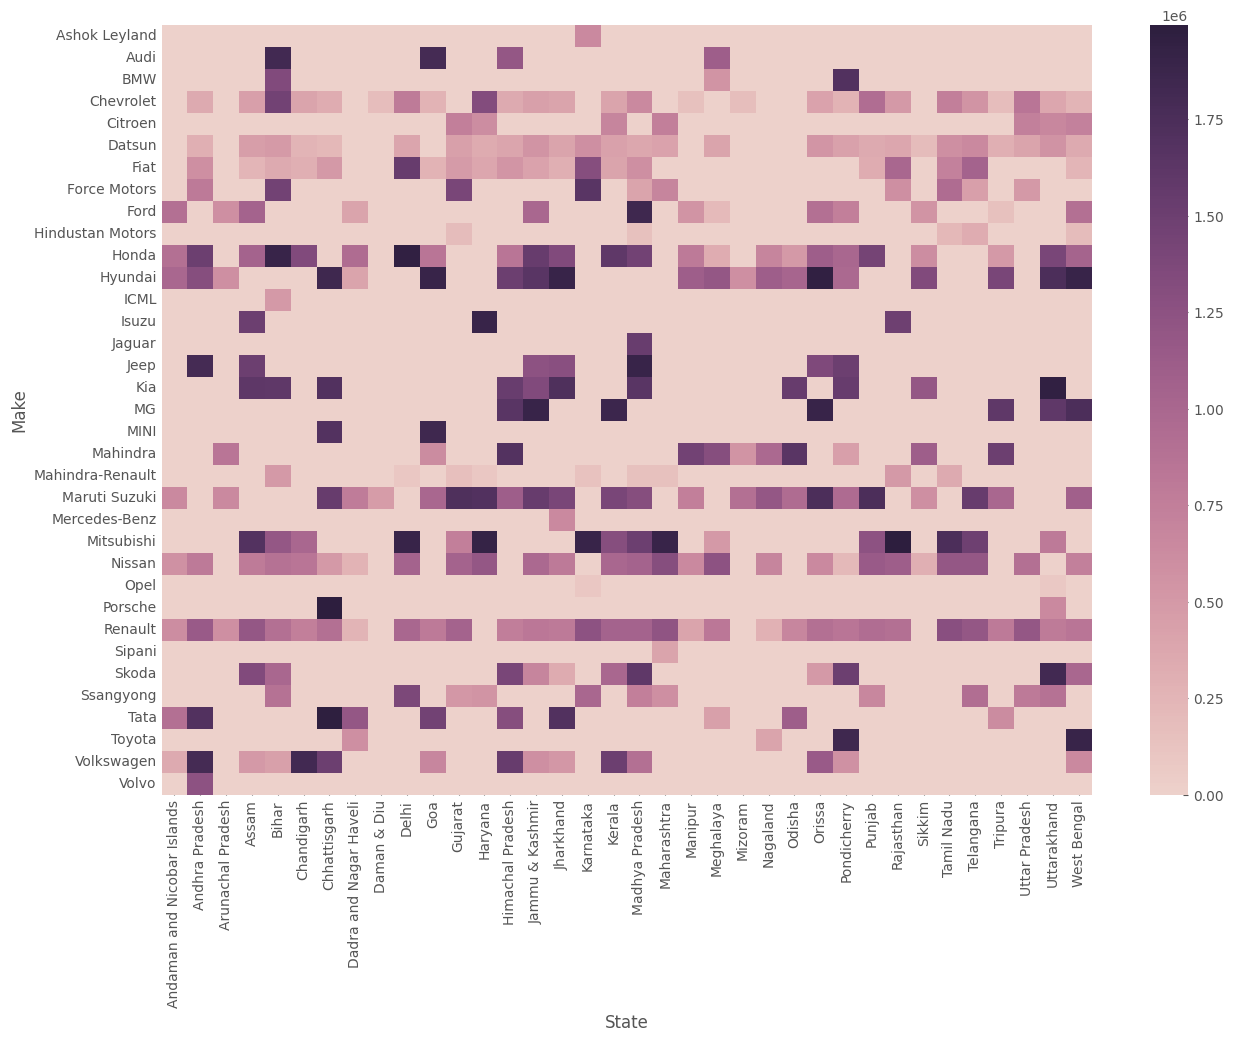

In [744]:
fig = plt.figure(figsize = (15,10)) 
sns.heatmap(max_carprice_state_2[max_carprice_state_2['Price_(Rs)'] <20_00_000].pivot(index = 'Make', columns = 'State', values = 'Price_(Rs)').replace(np.nan,0),
            cmap=sns.cubehelix_palette(as_cmap=True),
           )
plt.show()

## Brands with Price Greater than 20 Lakhs

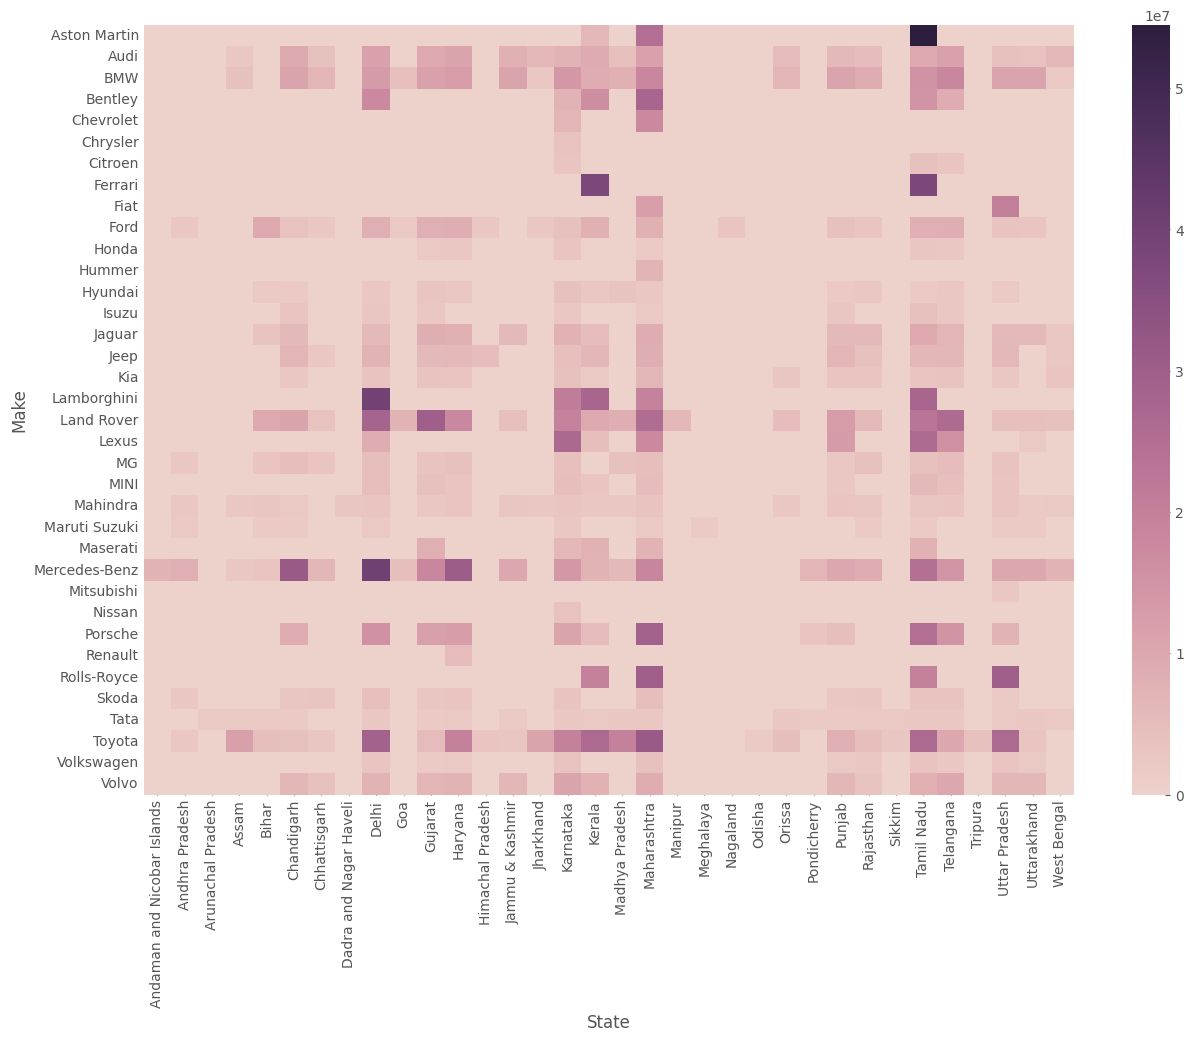

In [745]:
fig = plt.figure(figsize = (15,10)) 
sns.heatmap(max_carprice_state_2[max_carprice_state_2['Price_(Rs)'] > 20_00_000].pivot(index = 'Make', columns = 'State', values = 'Price_(Rs)').replace(np.nan,0),
            cmap=sns.cubehelix_palette(as_cmap=True),
           )
plt.show()